# [ 분석 목적 ]


본 연구는 '미국 주식시장이 상승한 날과 하락한 날 한국 주식시장에 주는 영향이 서로 다른가?'라는 질문에 기초한다. 본 연구에서는 한국 주식시장에 주는 영향을 세 가지(일별 수익률, 장중 수익률, 장중 변동성)로 정의하였다. 이후 이어지는 장에서 미국 주식시장의 상승/하락 여부에 따른 한국 주식시장의 일별 수익률, 장중 수익률의 관계와 두 지수의 장중 변동성의 관계를 분석한다.

# [ Data Description ]

본 연구를 위한 데이터는 investing.com에서 제공하는 KOSPI지수와 SNP500지수의 일별 수익률 자료를 사용하였다. 

investing.com에서는 S&P500 지수의 일별 데이터를 2006년 1월 4일부터 제한적으로 제공한다.

따라서, 분석 데이터의 기간을 2006년 1월 6일부터 2021년 4월 15일로 설정하였다. (2006년 1월 4일과 2006년 1월 5일은 일별 수익률을 계산할 수 없어서 제외하였다.)

In [8]:
import pandas as pd

In [12]:
df = pd.read_excel("./data.xlsx", index_col="Date", engine="openpyxl")
df.index = pd.to_datetime(df.index, format="%Y년 %m월 %d일") # 날짜 파싱

In [13]:
def str_to_float(x):
    if isinstance(x, str):
        return float(x.replace(",", "")) # 쉼표 제거
    return x
df = df.applymap(lambda x: str_to_float(x)) # 가격에 사칙연산을 적용하기 위해 str -> float으로 형변환

In [14]:
df

,KSP_CLOSE,KSP_OPEN,KSP_HIGH,KSP_LOW,SNP_CLOSE,SNP_OPEN,SNP_HIGH,SNP_LOW
Date,,,,,,,,
2006-01-04,1402.11,1408.19,1412.15,1400.08,1273.46,1268.80,1275.37,1267.74
2006-01-05,1395.51,1405.31,1405.31,1378.96,1273.48,1273.46,1276.91,1270.30
2006-01-06,1412.78,1399.23,1412.79,1395.26,1285.45,1273.48,1286.09,1273.48
2006-01-09,1408.33,1421.90,1421.90,1405.05,1290.15,1285.45,1290.78,1284.82
2006-01-10,1396.29,1413.14,1417.84,1388.70,1289.69,1290.15,1290.15,1283.76
...,...,...,...,...,...,...,...,...
2021-04-09,3131.88,3146.51,3156.04,3125.24,4128.80,4096.11,4129.48,4095.51
2021-04-12,3135.59,3134.88,3147.27,3127.91,4127.99,4124.71,4131.76,4114.82
2021-04-13,3169.08,3138.21,3173.26,3136.99,4141.59,4130.10,4148.00,4124.43


# [ Matching Dates ]

## Issue
한국과 미국 사이에는 시차가 존재한다. 따라서, 현재 데이터 상에서 코스피 지수 데이터가 S&P500 지수 데이터를 선행한다.

## Solution
미국 시장이 한국 시장에 미치는 영향을 분석하기 위해서는 미국 시장의 데이터가 선행하도록 시간을 조정해줄 필요가 있다.

그러므로, 미국 시장의 데이터를 한국 시간에 맞춰 하루씩 뒤로 미뤄준다.

In [15]:
df[["SNP_OPEN", "SNP_HIGH", "SNP_LOW", "SNP_CLOSE"]] = df[["SNP_OPEN", "SNP_HIGH", "SNP_LOW", "SNP_CLOSE"]].shift(1)

In [16]:
df

,KSP_CLOSE,KSP_OPEN,KSP_HIGH,KSP_LOW,SNP_CLOSE,SNP_OPEN,SNP_HIGH,SNP_LOW
Date,,,,,,,,
2006-01-04,1402.11,1408.19,1412.15,1400.08,NaN,NaN,NaN,NaN
2006-01-05,1395.51,1405.31,1405.31,1378.96,1273.46,1268.80,1275.37,1267.74
2006-01-06,1412.78,1399.23,1412.79,1395.26,1273.48,1273.46,1276.91,1270.30
2006-01-09,1408.33,1421.90,1421.90,1405.05,1285.45,1273.48,1286.09,1273.48
2006-01-10,1396.29,1413.14,1417.84,1388.70,1290.15,1285.45,1290.78,1284.82
...,...,...,...,...,...,...,...,...
2021-04-09,3131.88,3146.51,3156.04,3125.24,4097.17,4089.95,4098.19,4082.54
2021-04-12,3135.59,3134.88,3147.27,3127.91,4128.80,4096.11,4129.48,4095.51
2021-04-13,3169.08,3138.21,3173.26,3136.99,4127.99,4124.71,4131.76,4114.82


실제 2021년 4월 14일 S&P 지수의 종가는 4124.66이고, 2021년 4월 15일 KOSPI 지수의 종가는 3194.33이다.

위 데이터 상에서, 2021년 4월 15일의 S&P 지수 데이터는 실제 날짜로는 2021년 4월 14일 데이터에 해당한다.

# [ Converting Price Index To Return ]

## Issue

주어진 데이터는 가격 데이터이다. 분석을 위해서는 수익률 형태로 변환해주어야 한다.

## Solution

수익률 형태로 변환한 DataFrame을 새롭게 만든다.

In [17]:
ksp = df[["KSP_OPEN", "KSP_HIGH", "KSP_LOW", "KSP_CLOSE"]].dropna()
snp = df[["SNP_OPEN", "SNP_HIGH", "SNP_LOW", "SNP_CLOSE"]].dropna()

In [18]:
rt_ksp = pd.DataFrame({
    "KSP": ksp["KSP_CLOSE"] / ksp["KSP_CLOSE"].shift(1) -1, # 코스피 일별 수익률
    "KSP_DAY" : ksp["KSP_CLOSE"] / ksp["KSP_OPEN"] -1, # 코스피 장중 수익률
    "KSP_DAY_VOL" : (ksp["KSP_HIGH"] - ksp["KSP_LOW"]) / ksp["KSP_OPEN"], # 코스피 장중 변동성
})

In [19]:
rt_snp = pd.DataFrame({
    "SNP": snp["SNP_CLOSE"] / snp["SNP_CLOSE"].shift(1) -1, # S&P 일별 수익률
    "SNP_DAY" : snp["SNP_CLOSE"] / snp["SNP_OPEN"] -1, # S&P 장중 수익률
    "SNP_DAY_VOL" : (snp["SNP_HIGH"] - snp["SNP_LOW"]) / snp["SNP_OPEN"], # S&P 장중 변동성    
})

In [20]:
rt_merge = pd.merge(rt_ksp, rt_snp, left_index=True, right_index=True, how="outer")
rt_merge = rt_merge.iloc[2:] #2006년 1월 4일과 2006년 1월 5일은 일별 수익률을 계산할 수 없으므로 제외

In [21]:
rt_merge

,KSP,KSP_DAY,KSP_DAY_VOL,SNP,SNP_DAY,SNP_DAY_VOL
Date,,,,,,
2006-01-06,0.012375,0.009684,0.012528,0.000016,0.000016,0.005191
2006-01-09,-0.003150,-0.009544,0.011850,0.009399,0.009399,0.009902
2006-01-10,-0.008549,-0.011924,0.020621,0.003656,0.003656,0.004637
2006-01-11,-0.001576,-0.000402,0.011494,-0.000357,-0.000357,0.004953
2006-01-12,0.006090,0.002101,0.009131,0.003481,0.003458,0.005257
...,...,...,...,...,...,...
2021-04-09,-0.003620,-0.004650,0.009789,0.004221,0.001765,0.003826
2021-04-12,0.001185,0.000226,0.006176,0.007720,0.007981,0.008293
2021-04-13,0.010681,0.009837,0.011558,-0.000196,0.000795,0.004107


In [22]:
# merge 과정에서 미국(실제 t-1일)과 한국(실제 t일)이 동시에 휴일인 데이터가 제거된다.
len(df) != len(rt_merge)

True

# [ Handling Holidays ]

## Issue

한국과 미국의 서로 다른 연휴/휴장일로 인해 데이터 사이에 미스매치가 발생한다.

## Solution 
한국 혹은 미국의 휴장일에 대한 데이터 처리는 다음과 같다.

### t 일이 미국의 휴장일인 경우. 

t일의 S&P500 지수가 t+1일 코스피 지수에 미치는 영향을 분석할 수 없다. (일대일 대응이 성립하지 않는다) 

ex) t-1일 S&P 500 지수가 t일과 t+1일 코스피 지수에 미치는 영향을 분석할 때 중복으로 사용되면 안된다.

따라서, 미국의 휴장일은 데이터에서 제외하도록 한다.

**요약: t일이 미국 휴장일인 경우, 분석 대상에서 제외**

### t 일이 한국의 휴장일인 경우.

위와 같은 경우에는 정보량의 불균형이 발생한다. 일반적으로 휴장일이 없는 경우, t-1일 S&P 지수와 t일 코스피 지수가 1:1로 대응된다.

그러나, t일이 한국의 휴장일인 경우에는 t+1일 코스피 지수에는 t일의 미국 시장의 정보 뿐만 아니라 아직 반영되지 못한 t-1일의 미국 시장의 정보가 함께 영향을 줄 수 있을 것으로 예상된다. 구정, 추석과 같이 코스피 휴장일이 연속적으로 이어진 경우에는 이러한 경향이 극대화 될 것으로 추측된다. 

본 연구에서는 논의의 편의를 위해 t+1 일의 코스피 지수에는 미국의 직전 영업일이 미치는 영향(1:1 매칭)만을 분석하는 것으로 하였다.

**요약: t일이 한국의 휴장일인 경우 분석 대상에서 제외, t+1일 코스피 지수와 (t+1 -k)일(미국 직전 영업일) S&P 500 지수 사이의 관계를 분석**

### t 일이 미국과 한국 모두의 휴장일인 경우.

위 경우에는 모든 데이터가 null이므로 분석 대상에서 제외하였다.

In [23]:
american_holidays = rt_merge[rt_merge[["SNP"]].isnull().any(axis=1)].index # 미국 휴장일
list(american_holidays)[-2:]

[Timestamp('2021-02-16 00:00:00'), Timestamp('2021-04-05 00:00:00')]

## Data Verification
1. 데이터 상에서 2021년 2월 16일의 미국 주식시장 데이터는 실제로는 2021년 2월 15일에 해당한다.
> 2021년 2월 15일은 미국의 '대통령의 날'로 휴장일이 맞다. 

2. 데이터 상에서 2021년 4월 5일의 미국 주식시장 데이터는 실제로는 2021년 4월 2일에 해당한다.
> 2021년 4월 2일은 미국의 Good Friday(부활절)로 휴장일이 맞다. 

In [24]:
korean_holidays = rt_merge[rt_merge[["KSP"]].isnull().any(axis=1)].index # 한국 휴장일
list(korean_holidays)[-2:]

[Timestamp('2021-02-12 00:00:00'), Timestamp('2021-03-01 00:00:00')]

## Data Verification
> 2021년 2월 12일은 한국 '설날' 연휴의 마지막 날로 휴장일이 맞다.

> 2021년 3월 1일은 한국의 '삼일절'로 휴장일이 맞다.

In [25]:
# 미국 휴장일 + 한국 휴장일
holidays = sorted(list(set(list(american_holidays) + list(korean_holidays)))) 
holidays[:5]

[Timestamp('2006-01-17 00:00:00'),
 Timestamp('2006-01-30 00:00:00'),
 Timestamp('2006-02-21 00:00:00'),
 Timestamp('2006-03-01 00:00:00'),
 Timestamp('2006-04-17 00:00:00')]

In [26]:
rt = rt_merge.drop(holidays) # 휴장일 제거

In [27]:
rt

,KSP,KSP_DAY,KSP_DAY_VOL,SNP,SNP_DAY,SNP_DAY_VOL
Date,,,,,,
2006-01-06,0.012375,0.009684,0.012528,0.000016,0.000016,0.005191
2006-01-09,-0.003150,-0.009544,0.011850,0.009399,0.009399,0.009902
2006-01-10,-0.008549,-0.011924,0.020621,0.003656,0.003656,0.004637
2006-01-11,-0.001576,-0.000402,0.011494,-0.000357,-0.000357,0.004953
2006-01-12,0.006090,0.002101,0.009131,0.003481,0.003458,0.005257
...,...,...,...,...,...,...
2021-04-09,-0.003620,-0.004650,0.009789,0.004221,0.001765,0.003826
2021-04-12,0.001185,0.000226,0.006176,0.007720,0.007981,0.008293
2021-04-13,0.010681,0.009837,0.011558,-0.000196,0.000795,0.004107


In [28]:
rt.isnull().any(axis=1).sum() # nan인 데이터 없음

0

## KOSPI 지수의 일별 수익률과 S&P500 지수의 일별 수익률의 분포 비교

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
rt.describe()

,KSP,KSP_DAY,KSP_DAY_VOL,SNP,SNP_DAY,SNP_DAY_VOL
count,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000
mean,0.000346,-0.000405,0.012631,0.000450,0.000319,0.012612
std,0.012626,0.010004,0.009611,0.012803,0.011362,0.010764
min,-0.105705,-0.107296,0.002433,-0.119841,-0.087231,0.001457
25%,-0.005038,-0.004842,0.007172,-0.003868,-0.003545,0.006204
50%,0.000635,-0.000258,0.009986,0.000768,0.000686,0.009609
75%,0.006550,0.004440,0.014853,0.005739,0.005043,0.015023
max,0.119457,0.089775,0.150819,0.115800,0.107890,0.112190


/home/donghyungko/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/donghyungko/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


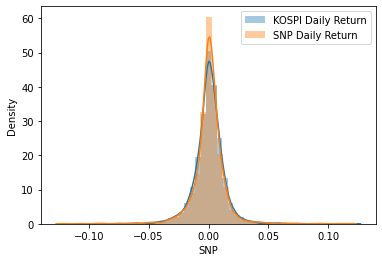

In [31]:
# 두 지수의 일별 수익률의 분포 비교
sns.distplot(rt["KSP"], label="KOSPI Daily Return")
sns.distplot(rt["SNP"], label="SNP Daily Return")
plt.legend(loc="best")

### 평균

In [32]:
import scipy.stats as sp

In [33]:
sp.ttest_ind(rt["KSP"], rt["SNP"])

Ttest_indResult(statistic=-0.35099993287720954, pvalue=0.725598497186803)

두 지수의 일별 수익률의 평균이 다르다고 해석하기 어렵다. 

### 분산

In [34]:
# 육안으로는 코스피 지수의 일별 수익률의 퍼짐 정도가 S&P500 지수의 퍼짐 정도보다 큰 것으로 보인다.
# 한국 주식시장의 변동성이 미국 주식시장의 변동성보다 크다고 추측해볼 수 있다.
# 분산 검정을 위해 Levene 등분산 검정을 수행
(stat, p) = sp.levene(rt["KSP"], rt["SNP"])

p

0.030341933098211194

Levene Test에 따르면 두 지수의 수익률의 분산은 5% 유의수준에서 차이를 보인다.

단, 주어진 데이터가 해당 가정을 만족하는지 여부를 확인하기 어려워 이에 대한 해석을 신뢰하기 어렵다.

## 미국 주식시장 상승/하락 변수 (dummy variable)  정의

미국 주식시장의 상승/하락은 미국 주식시장의 일별 수익률의 부호로 정의한다.

### $x_{t, is\_snp\_updown} : 1$  (S&P 상승)

### $x_{t, is\_snp\_updown} : 0$ (S&P 하락)

In [35]:
rt["IS_SNP_UP"] = (rt["SNP"] > 0).astype(float) # 더미 변수 정의

In [36]:
rt.head()

,KSP,KSP_DAY,KSP_DAY_VOL,SNP,SNP_DAY,SNP_DAY_VOL,IS_SNP_UP
Date,,,,,,,
2006-01-06,0.012375,0.009684,0.012528,0.000016,0.000016,0.005191,1.0
2006-01-09,-0.003150,-0.009544,0.011850,0.009399,0.009399,0.009902,1.0
2006-01-10,-0.008549,-0.011924,0.020621,0.003656,0.003656,0.004637,1.0
2006-01-11,-0.001576,-0.000402,0.011494,-0.000357,-0.000357,0.004953,0.0
2006-01-12,0.006090,0.002101,0.009131,0.003481,0.003458,0.005257,1.0


## 미국 주식시장 상승/하락에 따른 코스피 지수의 일별 수익률 분석

In [37]:
snp_up = rt[rt["IS_SNP_UP"] == 1.0] # 미국 주식시장이 상승한 날
snp_down = rt[rt["IS_SNP_UP"] == 0.0] # 미국 주식시장이 하락한 날

/home/donghyungko/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/donghyungko/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


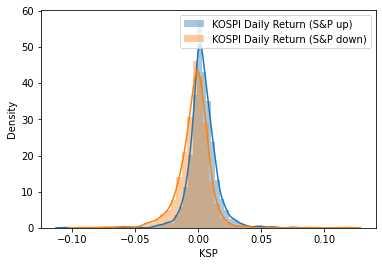

In [38]:
sns.distplot(snp_up["KSP"], label="KOSPI Daily Return (S&P up)")
sns.distplot(snp_down["KSP"], label="KOSPI Daily Return (S&P down)")
plt.legend(loc="best")

**두 분포는 육안으로도 확연하게 차이를 보인다.**

## Hypothesis Test

### $H_0: M_{(kospi, snp\_up)} = M_{(kospi, snp\_down)}$
### $H_1: M_{(kospi, snp\_up)} \neq M_{(kospi, snp\_down)}$

$M_{(kospi, snp\_up)}$: S&P지수가 상승한 날의 코스피 지수 수익률의 평균

$M_{(kospi, snp\_down)}$: S&P지수가 하락한 날의 코스피 지수 수익률의 평균

In [39]:
sp.ttest_ind(list(snp_up["KSP"]), list(snp_down["KSP"]))

Ttest_indResult(statistic=16.675119502755305, pvalue=3.147734601699168e-60)

### 해석 
1% 유의수준 하에서, S&P 지수가 상승한 날의 코스피 지수 일별 수익률의 평균이 S&P지수가 하락한 날의 코스피 지수 일별 수익률의 평균보다 크다.

## Hypothesis Test

### 모형

### $r_{(t, kospi)} = \beta_{0}  + \beta_{1} x_{(t, is\_snp\_up)}$

### $H_0: \beta_{1} = 0$
### $H_1: \beta_{1} \neq 0$

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
model = smf.ols(formula="KSP ~ IS_SNP_UP", data=rt)
results = model.fit()

Table = pd.DataFrame({
    "b" : round(results.params, 4),
    "se" : round(results.bse, 4),
    "t" : round(results.tvalues, 4),
    "pval" : round(results.pvalues, 4)
})
print(f"Table: \n{Table}\n")
print(f"R2: {round(results.rsquared, 4)}")

Table: 
                b      se        t  pval
Intercept -0.0034  0.0003 -11.2325   0.0
IS_SNP_UP  0.0067  0.0004  16.6751   0.0

R2: 0.0706


### 해석

1. 1% 유의수준 하에서, S&P 지수가 상승 여부는 코스피 지수 수익률에 유의미한 영향을 준다
2. S&P 지수가 상승한 날에 코스피 지수가 상승하는 뚜렷한 경향이 존재한다.
3. 당일 코스피 지수 수익률에 영향을 주는 유의미한 변수가 포함될 경우, S&P 지수 상승 여부에 따른 코스피 지수 수익률의 변화량($\beta_1$)이 비유의적으로 변할 수 있으므로, 새로운 변수를 추가한 분석이 요구된다.

## Hypothesis Test

### 모형

### $r_{(t, kospi)} = \beta_{0}  + \beta_{2}r_{(t, snp)}$

In [42]:
model = smf.ols(formula="KSP ~ SNP", data=rt)
results = model.fit()

Table = pd.DataFrame({
    "b" : round(results.params, 4),
    "se" : round(results.bse, 4),
    "t" : round(results.tvalues, 4),
    "pval" : round(results.pvalues, 4)
})
print(f"Table: \n{Table}\n")
print(f"R2: {round(results.rsquared, 4)}")

Table: 
                b      se        t    pval
Intercept  0.0002  0.0002   0.9338  0.3505
SNP        0.3666  0.0151  24.2263  0.0000

R2: 0.1382


### 해석

1. 1% 유의수준 하에서, 전일 S&P 지수의 수익률은 당일 코스피 지수 수익률에 유의미한 영향을 준다 (위와 동일)

2. 전일 S&P500 지수의 1% 포인트 상승은, 당일 코스피 지수 수익률에 0.36% 포인트 상승 만큼의 영향을 준다.

## Hypothesis Test

### 모형

### $r_{(t, kospi)} = \beta_{0}  + \beta_{1} x_{(t, is\_snp\_up)} + \beta_{2}r_{(t, snp)}$

In [43]:
model = smf.ols(formula="KSP ~ IS_SNP_UP + SNP", data=rt)
results = model.fit()

Table = pd.DataFrame({
    "b" : round(results.params, 4),
    "se" : round(results.bse, 4),
    "t" : round(results.tvalues, 4),
    "pval" : round(results.pvalues, 4)
})
print(f"Table: \n{Table}\n")
print(f"R2: {round(results.rsquared, 4)}")

Table: 
                b      se        t    pval
Intercept -0.0006  0.0003  -1.7612  0.0783
IS_SNP_UP  0.0014  0.0005   2.8428  0.0045
SNP        0.3324  0.0193  17.1955  0.0000

R2: 0.1401


### 해석

1. 1% 유의수준 하에서, S&P 지수가 상승 여부는 여전히 코스피 지수 수익률에 유의미한 영향을 준다. 단, 그 크기와 유의성은 S&P 지수의 수익률 변수를 추가하기 전보다 작아졌다.

2. 1% 유의수준 하에서, 전일 S&P 지수의 수익률은 당일 코스피 지수 수익률에 유의미한 영향을 준다 (위와 동일)

3. 전일 S&P지수의 상승/하락 여부를 고려한 S&P500 지수의 1% 포인트 상승은, 당일 코스피 지수 수익률에 0.33% 포인트 상승 만큼의 영향을 준다.

## Hypothesis Test

### 모형

### $r_{(t, kospi)} = \beta_{0}  + \beta_{1} x_{(t, is\_snp\_up)} + \beta_{2}r_{(t, snp)} + \beta_{3}x_{(t, is\_snp\_up)}r_{(t, snp)}$

In [44]:
rt["SNP*IS_SNP_UP"] = rt["SNP"] * rt["IS_SNP_UP"]

In [45]:
model = smf.ols(formula="KSP ~ IS_SNP_UP + SNP + SNP*IS_SNP_UP", data=rt)
results = model.fit()

Table = pd.DataFrame({
    "b" : round(results.params, 4),
    "se" : round(results.bse, 4),
    "t" : round(results.tvalues, 4),
    "pval" : round(results.pvalues, 4)
})
print(f"Table: \n{Table}\n")
print(f"R2: {round(results.rsquared, 4)}")

Table: 
                    b      se        t    pval
Intercept      0.0002  0.0004   0.5992  0.5491
IS_SNP_UP      0.0014  0.0005   2.8479  0.0044
SNP            0.4279  0.0266  16.0635  0.0000
SNP:IS_SNP_UP -0.2002  0.0386  -5.1920  0.0000

R2: 0.1464


### 해석

S&P 지수 수익률과 S&P상승/하락 여부의 교호효과를 새롭게 반영한 결과

1. 1% 유의수준 하에서, S&P지수의 상승/하락 여부가 미치는 영향에는 이전과 큰 차이가 없었다.

2. 1% 유의수준 하에서, 전일 S&P 지수의 수익률이 당일 코스피 지수의 일별 수익률에 미치는 효과의 크기가 증가하였다. (0.33 -> 0.42, 당연하게도 S&P 수익률과 교호작용 변수 사이에 높은 상관관계가 존재한다).

3. 새롭게 추가한 교호작용 변수의 회귀계수($\beta_3$)는 전일 S&P 지수 하락/상승 여부에 따른 S&P 지수 수익률이 코스피 지수의 일별 수익률이 영향을 미치는 정도로 해석할 수 있다. $\beta_3$은1% 유의수준 하에서 유의미한 음의 값을 갖는다. 다시 말해, 미국 시장의 상승/하락 여부에 따라 S&P 지수 수익률이 한국 시장에 미치는 영향의 정도에 유의미한 차이가 존재한다. 특히, 하락 시기에 영향을 미치는 정도가 더 크다. 이와 관련된 해석은 이어지는 장에서 자세히 서술하도록 한다.

In [46]:
rt[["SNP", "SNP*IS_SNP_UP"]].corr()

,SNP,SNP*IS_SNP_UP
SNP,1.000000,0.773606
SNP*IS_SNP_UP,0.773606,1.000000


## Hypothesis Test

### 모형

### $r_{(t, kospi)} = \beta_{0}  + \beta_{1} x_{(t, is\_snp\_up)} + \beta_{2}r_{(t, snp)} + \beta_{3}x_{(t, is\_snp\_up)}r_{(t, snp)} + \beta_{4}r_{(t, snp)}^2$

In [47]:
rt["SNP_SQUARE"] = rt["SNP"] * rt["SNP"]

In [48]:
model = smf.ols(formula="KSP ~ IS_SNP_UP + SNP + SNP*IS_SNP_UP + SNP_SQUARE", data=rt)
results = model.fit()

Table = pd.DataFrame({
    "b" : round(results.params, 4),
    "se" : round(results.bse, 4),
    "t" : round(results.tvalues, 4),
    "pval" : round(results.pvalues, 4)
})
print(f"Table: \n{Table}\n")
print(f"R2: {round(results.rsquared, 4)}")

Table: 
                    b      se       t    pval
Intercept     -0.0001  0.0004 -0.2788  0.7804
IS_SNP_UP      0.0014  0.0005  2.8462  0.0044
SNP            0.3616  0.0408  8.8636  0.0000
SNP:IS_SNP_UP -0.0676  0.0729 -0.9274  0.3538
SNP_SQUARE    -1.2168  0.5672 -2.1451  0.0320

R2: 0.1475


### 해석

S&P 지수 수익률이 코스피 지수 일별 수익률에 미치는 비선현성을 추가적으로 고려한 결과,
1. 1% 유의수준 하에서, S&P 지수가 상승 여부는 여전히 코스피 지수 수익률에 유의미한 영향을 준다.

2. 1% 유의수준 하에서, 전일 S&P 지수의 수익률은 당일 코스피 지수 수익률에 유의미한 영향을 준다. (위와 동일)

3. $\beta_3$는 S&P지수 수익률의 방향성에 따라 S&P 지수가 한국 주식시장에 영향을 미치는 정도를 나타내는 반면, $\beta_4$는 전일 S&P 지수 수익률의 크기(변동성)이 영향을 미치는 정도를 의미한다. 

4. 이전 모형에서 유의미하였던 $\beta_3$가 유의미하지 않게 바뀌었다. 교호작용 변수와 비선형성 변수 사이에는 높은 상관관계가 존재한다. 미국 주식시장이 한국 주식시장에 영향을 미치는 정도는 방향보다 크기에 따른 차이가 더 뚜렷하다고 해석할 수 있다. 이는 직관과도 어느정도 일치한다. 미국 주식시장이 횡보한 날(ex, $\pm 3bp$)과 같이 수익률의 변동폭이 매우 작은 날에는 상승/하락 여부가 그렇게 중요하지 않을 것으로 생각된다. 오히려, 미국 주식시장에 큰 변동이 있던 날에 한국 주식시장에 미치는 영향이 더 클 것으로 예상된다.

5. 5% 유의수준 하에서, S&P 수익률이 코스피 지수 수익률에 미치는 비선형성($\beta_5$)은 유의미하게 존재한다.

In [49]:
rt[["SNP", "SNP*IS_SNP_UP", "SNP_SQUARE"]].corr()

,SNP,SNP*IS_SNP_UP,SNP_SQUARE
SNP,1.000000,0.773606,-0.050441
SNP*IS_SNP_UP,0.773606,1.000000,0.498045
SNP_SQUARE,-0.050441,0.498045,1.000000


## 미국 주식시장 상승/하락에 따른 코스피 지수의 장중 수익률 분석

In [50]:
snp_up = rt[rt["IS_SNP_UP"] == 1.0] # 미국 주식시장이 상승한 날
snp_down = rt[rt["IS_SNP_UP"] == 0.0] # 미국 주식시장이 하락한 날

/home/donghyungko/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/donghyungko/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


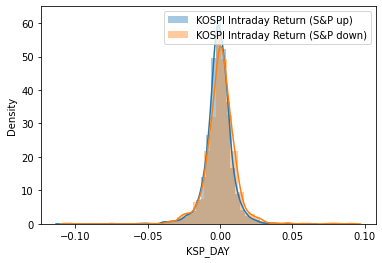

In [51]:
sns.distplot(snp_up["KSP_DAY"], label="KOSPI Intraday Return (S&P up)")
sns.distplot(snp_down["KSP_DAY"], label="KOSPI Intraday Return (S&P down)")
plt.legend(loc="best")

이전과는 달리 두 분포가 뚜렷한 차이를 보이지 않는다

## Hypothesis Test

### $H_0: M_{(kospi\_day, snp\_up)} = M_{(kospi\_day, snp\_down)}$
### $H_1: M_{(kospi\_day, snp\_up)} \neq M_{(kospi\_day, snp\_down)}$

$M_{(kospi\_day, snp\_up)}$: S&P지수가 상승한 날의 코스피 지수의 장중 수익률 평균

$M_{(kospi\_day, snp\_down)}$: S&P지수가 하락한 날의 코스피 지수의 장중 수익률 평균

In [52]:
sp.ttest_ind(list(snp_up["KSP_DAY"]), list(snp_down["KSP_DAY"]))

Ttest_indResult(statistic=-4.841212076829891, pvalue=1.3438369092694381e-06)

### 해석 
**1% 유의수준 하에서, S&P 지수가 상승한 날의 코스피 지수 장중 수익률의 평균이 S&P지수가 하락한 날의 코스피 지수 장중 수익률의 평균보다 작다.**

=> 코스피 일별 수익률로 분석한 결과와 반대로 나타났다.

## Hypothesis Test

### 모형

### $r_{(t, kospi\_day)} = \beta_{0}  + \beta_{1} x_{(t, is\_snp\_up)}$

### $H_0: \beta_{1} = 0$
### $H_1: \beta_{1} \neq 0$

In [53]:
model = smf.ols(formula="KSP_DAY ~ IS_SNP_UP", data=rt)
results = model.fit()

Table = pd.DataFrame({
    "b" : round(results.params, 4),
    "se" : round(results.bse, 4),
    "t" : round(results.tvalues, 4),
    "pval" : round(results.pvalues, 4)
})
print(f"Table: \n{Table}\n")
print(f"R2: {round(results.rsquared, 4)}")

Table: 
                b      se       t    pval
Intercept  0.0005  0.0002  1.9504  0.0512
IS_SNP_UP -0.0016  0.0003 -4.8412  0.0000

R2: 0.0064


### 해석

1. 1% 유의수준 하에서, S&P 지수가 상승 여부는 코스피 지수 장중 수익률에 유의미한 영향을 준다
2. S&P 지수가 상승한 날에 코스피 지수의 장중 수익률이 하락하는 뚜렷한 경향이 존재한다.
3. 당일 코스피 지수 장중 수익률에 영향을 주는 유의미한 변수가 포함될 경우, S&P 지수 상승 여부에 따른 코스피 지수 장중 수익률의 변화량($\beta_1$)이 비유의적으로 변할 수 있으므로, 새로운 변수를 추가한 분석이 요구된다.

## Hypothesis Test

### 모형

### $r_{(t, kospi\_day)} = \beta_{0}  + \beta_{2}r_{(t, snp)}$

In [54]:
model = smf.ols(formula="KSP_DAY ~ SNP", data=rt)
results = model.fit()

Table = pd.DataFrame({
    "b" : round(results.params, 4),
    "se" : round(results.bse, 4),
    "t" : round(results.tvalues, 4),
    "pval" : round(results.pvalues, 4)
})
print(f"Table: \n{Table}\n")
print(f"R2: {round(results.rsquared, 4)}")

Table: 
                b      se        t    pval
Intercept -0.0003  0.0002  -2.1055  0.0353
SNP       -0.1377  0.0127 -10.8347  0.0000

R2: 0.0311


### 해석

1. 1% 유의수준 하에서, 전일 S&P 지수의 수익률의 변화는 당일 코스피 지수 장중 수익률에 유의미한 영향을 준다 (위와 동일)

2. 전일 S&P500 지수의 1% 포인트 상승은, 당일 코스피 지수 장중 수익률에 0.14% 포인트 하락 만큼의 영향을 준다.

## Hypothesis Test

### 모형

### $r_{(t, kospi\_day)} = \beta_{0}  + \beta_{1} x_{(t, is\_snp\_up)} + \beta_{2}r_{(t, snp)}$

In [55]:
model = smf.ols(formula="KSP_DAY ~ IS_SNP_UP + SNP", data=rt)
results = model.fit()

Table = pd.DataFrame({
    "b" : round(results.params, 4),
    "se" : round(results.bse, 4),
    "t" : round(results.tvalues, 4),
    "pval" : round(results.pvalues, 4)
})
print(f"Table: \n{Table}\n")
print(f"R2: {round(results.rsquared, 4)}")

Table: 
                b      se       t    pval
Intercept -0.0009  0.0003 -3.1501  0.0016
IS_SNP_UP  0.0010  0.0004  2.3648  0.0181
SNP       -0.1617  0.0162 -9.9532  0.0000

R2: 0.0326


### 해석

**1. S&P 수익률을 고려한 결과, 전일 S&P 지수 상승/하락이 코스피 지수의 장중 수익률에 미치는 영향이 음수에서 양수로 변하였으며, 5% 유의수준 하에서 유의미하다.**

2. 1% 유의수준 하에서, 전일 S&P 지수의 수익률은 당일 코스피의 장중 지수 수익률에 유의미한 영향을 준다.

3. 전일 S&P지수의 상승/하락 여부를 고려한 S&P500 지수의 1% 포인트 상승은, 당일 코스피 지수 수익률에 0.16% 포인트 하락 만큼의 영향을 준다.

## Hypothesis Test

### 모형

### $r_{(t, kospi\_day)} = \beta_{0}  + \beta_{1} x_{(t, is\_snp\_up)} + \beta_{2}r_{(t, snp)} + \beta_{3}x_{(t, is\_snp\_up)}r_{(t, snp)}$

In [56]:
rt["SNP*IS_SNP_UP"] = rt["SNP"] * rt["IS_SNP_UP"]

In [57]:
model = smf.ols(formula="KSP_DAY ~ IS_SNP_UP + SNP + SNP*IS_SNP_UP", data=rt)
results = model.fit()

Table = pd.DataFrame({
    "b" : round(results.params, 4),
    "se" : round(results.bse, 4),
    "t" : round(results.tvalues, 4),
    "pval" : round(results.pvalues, 4)
})
print(f"Table: \n{Table}\n")
print(f"R2: {round(results.rsquared, 4)}")

Table: 
                    b      se       t    pval
Intercept     -0.0007  0.0003 -2.2754  0.0229
IS_SNP_UP      0.0010  0.0004  2.3638  0.0181
SNP           -0.1405  0.0225 -6.2545  0.0000
SNP:IS_SNP_UP -0.0444  0.0325 -1.3646  0.1725

R2: 0.033


### 해석

S&P 지수 수익률과 S&P상승/하락 여부의 교호효과를 새롭게 반영한 결과

1. 5% 유의수준 하에서, S&P지수의 상승/하락 여부가 미치는 영향($\beta_1$)에는 이전과 큰 차이가 없었다.

2. 1% 유의수준 하에서, 전일 S&P 지수의 수익률이 당일 코스피 지수의 일별 수익률에 미치는 효과의 크기($\beta_2$)에도 뚜렷한 변화는 발생하지 않았다.

3. 새롭게 추가한 교호작용 변수의 회귀계수($\beta_3$)는 전일 S&P 지수 하락/상승 여부에 따른 S&P 지수 수익률이 코스피 지수의 일별 수익률이 영향을 미치는 정도로 해석할 수 있다. $\beta_3$은1% 유의미하지 않은 변수로 해석된다. 코스피 지수의 일별 수익률을 종속변수로 사용한 회귀 모형에서와 차이를 보인다.

## Hypothesis Test

### 모형

### $r_{(t, kospi\_day)} = \beta_{0}  + \beta_{1} x_{(t, is\_snp\_up)} + \beta_{2}r_{(t, snp)} + \beta_{3}x_{(t, is\_snp\_up)}r_{(t, snp)} + \beta_{4}r_{(t, snp)}^2$

In [58]:
rt["SNP_SQUARE"] = rt["SNP"] * rt["SNP"]

In [59]:
model = smf.ols(formula="KSP_DAY ~ IS_SNP_UP + SNP + SNP*IS_SNP_UP + SNP_SQUARE", data=rt)
results = model.fit()

Table = pd.DataFrame({
    "b" : round(results.params, 4),
    "se" : round(results.bse, 4),
    "t" : round(results.tvalues, 4),
    "pval" : round(results.pvalues, 4)
})
print(f"Table: \n{Table}\n")
print(f"R2: {round(results.rsquared, 4)}")

Table: 
                    b      se       t    pval
Intercept     -0.0009  0.0003 -2.7955  0.0052
IS_SNP_UP      0.0010  0.0004  2.3619  0.0182
SNP           -0.1874  0.0344 -5.4463  0.0000
SNP:IS_SNP_UP  0.0495  0.0615  0.8047  0.4210
SNP_SQUARE    -0.8608  0.4784 -1.7991  0.0721

R2: 0.0339


### 해석

S&P 지수 수익률이 코스피 지수 장중 수익률에 미치는 비선현성을 추가적으로 고려한 결과,
1. 5% 유의수준 하에서, S&P 지수가 상승 여부는 여전히 코스피 지수 수익률에 유의미한 영향을 준다.

2. 1% 유의수준 하에서, 전일 S&P 지수의 수익률은 당일 코스피 지수 수익률에 유의미한 영향을 준다. (위와 동일)

3. $\beta_3$는 S&P지수 수익률의 방향성에 따라 S&P 지수가 한국 주식시장에 영향을 미치는 정도를 나타내는 반면, $\beta_4$는 전일 S&P 지수 수익률의 크기(변동성)이 영향을 미치는 정도를 의미한다. 

4. $\beta_3$가 여전히 유의미하지 않다. 

5. 10% 유의수준 하에서, S&P 수익률이 코스피 지수 장중 수익률에 미치는 비선형성($\beta_5$)은 존재한다.

## 미국 주식시장의 장중 변동성에 따른 코스피 지수의 장중 변동성 분석

/home/donghyungko/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/donghyungko/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


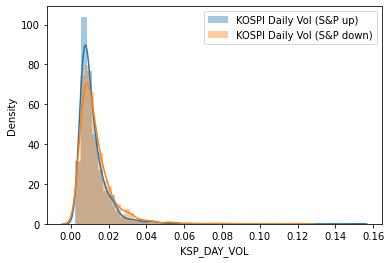

In [60]:
sns.distplot(snp_up["KSP_DAY_VOL"], label="KOSPI Daily Vol (S&P up)")
sns.distplot(snp_down["KSP_DAY_VOL"], label="KOSPI Daily Vol (S&P down)")
plt.legend(loc="best")

## 해석

1. 육안으로 볼 때, S&P 지수가 상승한 날의 장중 변동성보다 하락한 날의 장중 변동성이 크다. 한국 투자자들은 S&P 지수의 하락에 더욱 민감하게 반응하는 것으로 추측할 수 있다.

2. 코스피 지수의 장중 변동성은 노말 분포를 따르지 않는 것처럼 보여진다.

## Hypothesis Test

### $H_0: M_{(kospi\_day\_vol, snp\_up)} = M_{(kospi\_day\_vol, snp\_down)}$
### $H_1: M_{(kospi\_day\_vol, snp\_up)} \neq M_{(kospi\_day\_vol, snp\_down)}$

$M_{(kospi\_day\_vol, snp\_up)}$: S&P지수가 상승한 날의 코스피 지수의 장중 변동성의 평균

$M_{(kospi\_day\_vol, snp\_down)}$: S&P지수가 하락한 날의 코스피 지수의 장중 변동성의 평균

In [61]:
sp.ttest_ind(list(snp_up["KSP_DAY_VOL"]), list(snp_down["KSP_DAY_VOL"]))

Ttest_indResult(statistic=-5.7195611273618026, pvalue=1.1535497868101912e-08)

### 해석 
1. 1% 유의수준 하에서, S&P 지수가 상승한 날의 코스피 지수의 장중 변동성의 평균이 S&P지수가 하락한 날의 코스피 지수 장중 변동성의 평균보다 작다.

#### 2. 한국 투자자는 미국 시장의 하락에 더욱 민감하게 반응한다.


## Hypothesis Test

### 모형

### $v_{(t, kospi\_day)} = \beta_{0}  + \beta_{1}v_{(t, snp\_day)}$

$v_{(t, kospi\_day)}$: t일 코스피 지수의 장중 변동성

$v_{(t, snp\_day)}$: t일 S&P 지수의 장중 변동성

### $H_0: \beta_{1} = 0$
### $H_1: \beta_{1} \neq 0$

In [62]:
model = smf.ols(formula="KSP_DAY_VOL ~ SNP_DAY_VOL", data=rt)
results = model.fit()

Table = pd.DataFrame({
    "b" : round(results.params, 4),
    "se" : round(results.bse, 4),
    "t" : round(results.tvalues, 4),
    "pval" : round(results.pvalues, 4)
})
print(f"Table: \n{Table}\n")
print(f"R2: {round(results.rsquared, 4)}")

Table: 
                  b      se        t  pval
Intercept    0.0057  0.0002  29.5943   0.0
SNP_DAY_VOL  0.5483  0.0116  47.0692   0.0

R2: 0.3771


### 해석

1. 1% 유의수준 하에서, S&P 지수의 장중 변동성은 코스피 지수의 장중 변동성에 매우 유의미한 양의 영향을 준다.

## Hypothesis Test

### 모형

### $v_{(t, kospi\_day)} = \beta_{0}  + \beta_{1}v_{(t, snp\_day)} +  \beta_{2}x_{(t, is\_snp\_up)} +  \beta_{3}v_{(t, snp\_day)}x_{(t, is\_snp\_up)}$

In [63]:
rt["SNP_DAY_VOL*IS_SNP_UP"] = rt["SNP_DAY_VOL"] * rt["IS_SNP_UP"]

In [64]:
model = smf.ols(formula="KSP_DAY_VOL ~ SNP_DAY_VOL + SNP_DAY_VOL*IS_SNP_UP", data=rt)
results = model.fit()

Table = pd.DataFrame({
    "b" : round(results.params, 4),
    "se" : round(results.bse, 4),
    "t" : round(results.tvalues, 4),
    "pval" : round(results.pvalues, 4)
})
print(f"Table: \n{Table}\n")
print(f"R2: {round(results.rsquared, 4)}")

Table: 
                            b      se        t    pval
Intercept              0.0055  0.0003  18.9263  0.0000
SNP_DAY_VOL            0.5886  0.0163  36.0432  0.0000
IS_SNP_UP              0.0004  0.0004   1.1486  0.2508
SNP_DAY_VOL:IS_SNP_UP -0.0885  0.0234  -3.7914  0.0002

R2: 0.3807


### 해석
 S&P 지수의 상승/하락 여부와 S&P 지수의 장중 변동성과 S&P 지수의 상승/하락 여부의 교호작용을 추가적으로 반영한 결과

1. 여전히, 1% 유의수준 하에서 S&P 지수의 장중 변동성은 코스피 지수의 장중 변동성($\beta_1$)에 매우 유의미한 영향을 준다.

2. 새롭게 추가한 더미 변수의 영향($\beta_2$)은 S&P 지수의 상승 하락 여부가 코스피 시장의 장중 변동성에 미치는 영향으로 해석할 수 있다. $\beta_2$는 유의미하지 않은 변수로 보인다. 즉, 미국 시장의 상승/하락 여부가 직접적으로 코스피 시장의 변동성에 영향을 준다고 보긴 어렵다.

3. 새롭게 추가한 교호작용 변수의 영향($\beta_3$)은 S&P 지수의 상승 하락 여부에 따른 S&P 지수의 장중 변동성이 코스피 시장의 장중 변동성에 미치는 영향으로 해석할 수 있다. $\beta_3$는 1% 유의수준 하에서 음의 영향력을 갖는 것으로 보인다. 이를 해석하면, S&P지수가 상승한 날보다 하락한 날에 한국 주식시장의 참가자들이 더 민감하게 반응한다고 볼 수 있다. 이에 대한 추가적은 해석은 뒷 장에서 다루도록 한다.

## Hypothesis Test

### 모형

### $v_{(t, kospi\_day)} = \beta_{0}  + \beta_{1}v_{(t, snp\_day)} +  \beta_{2}x_{(t, is\_snp\_up)} +  \beta_{3}v_{(t, snp\_day)}x_{(t, is\_snp\_up)} + \beta_{4}v_{(t, snp\_day)}^2$

In [65]:
rt["SNP_DAY_VOL_SQUARE"] = rt["SNP_DAY_VOL"] * rt["SNP_DAY_VOL"]

In [66]:
model = smf.ols(formula="KSP_DAY_VOL ~ SNP_DAY_VOL + SNP_DAY_VOL*IS_SNP_UP + SNP_DAY_VOL_SQUARE", data=rt)
results = model.fit()

Table = pd.DataFrame({
    "b" : round(results.params, 4),
    "se" : round(results.bse, 4),
    "t" : round(results.tvalues, 4),
    "pval" : round(results.pvalues, 4)
})
print(f"Table: \n{Table}\n")
print(f"R2: {round(results.rsquared, 4)}")

Table: 
                            b      se        t    pval
Intercept              0.0066  0.0004  18.8704  0.0000
SNP_DAY_VOL            0.4582  0.0283  16.1915  0.0000
IS_SNP_UP              0.0003  0.0004   0.9008  0.3678
SNP_DAY_VOL:IS_SNP_UP -0.0886  0.0233  -3.8121  0.0001
SNP_DAY_VOL_SQUARE     2.1138  0.3757   5.6264  0.0000

R2: 0.386


### 해석
S&P 지수의 장중 변동성의 비선형 효과를 추가적으로 반영한 결과

1. $\beta_1$의 크기가 조금 작아졌지만, 기존의 변수들이 종속변수에 미치는 방향과 크기, 유의성은 거의 유사하였다.

2. $\beta_4$는 미국 주식시장의 장중 변동성의 절대적인 크기가 한국 주식시장의 장중 변동성에 미치는 영향의 정도로 해석할 수 있다. 앞서, 수익률 변수를 종속 변수로 사용하였을 때와 유사하게, 미국 주식시장의 변동성의 절대적인 크기가 클 수록, 한국 주식시장에 미치는 영향력이 더욱 큰 것(1% 유의수준 하에서)으로 나타났다.

In [67]:
%%capture
!pip install IPython
from IPython.display import Image

## 주가 수익률의 성질과 관계

### 수익률의 분해

일반적으로 주가 데이터를 분석할 때, 가장많이 활용되는 일별 수익률은 전일 대비 종가 수익률의 변화량으로 측정된다. 일별 수익률은 다음과 같이 장중 수익률과 야간 수익률로 분해할 수 있다.


### $r_{D, t} = \frac{C_t}{O_t}$  -1

### $r_{N, t} = \frac{O_t}{C_{t-1}}$ -1


### $r_{t} = (1 + r_{D, t}) (1 + r_{N, t})$

$r_{t}$: t일의 종가 수익률

$r_{D, t}$: t일의 장중 수익률, 정규 시간(daytime)의 가격 변화

$r_{N, t}$: t일의 야간 수익률, 정규 시간외(overnight)의 가격 변화

$C_t$: t일의 종가(close)

$O_t$: t일의 시가 (open) 

### 선행연구

선행 연구에 따르면, 활발하게 거래가 발생하는 장중의 수익률과 밤중 쌓인 정보가 반영되어 단일가 매매로 한번에 결정되는 야간 수익률은 매우 다른 성질을 가지고 있다.  


### Variance of Returns

F. Wang(2009)은 1998년부터 2007년까지 미국 시장에 상장된 2,215개의 개별 종목의 종가 수익률, 야간 수익률, 주간 수익률의 성질과 관계에 대하여 분석하였다. **F. Wang에 따르면, 종가 수익률의 변동성의 대부분은 주간 수익률에의해 derive된다.** 야간 수익률의 일반적으로 그 변동성이 주간 수익률에 비해 상대적으로 작다.

F.Wang(2009), "Statistical analysis of the overnight and daytime return"

In [130]:
from IPython.display import Image

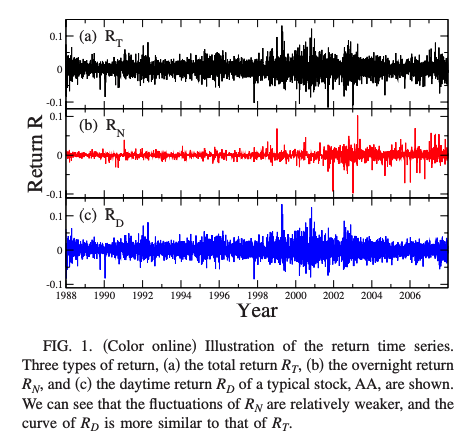

In [131]:
Image("스크린샷 2021-04-16 오전 3.56.10.png")

추가적으로, 일부 종목을 대상으로 수익률 분포의 꼬리를 멱함수로 모델링하여 분석한 결과에서도 동일하게 종가 수익률 변동성의 꼬리 분포(circles)가 주간 수익률 변동성의 꼬리분포(triangles)와 매우 흡사하며 야간 수익률의 변동성(squares)과는 차이를 보인다는 것을 확인할 수 있다.


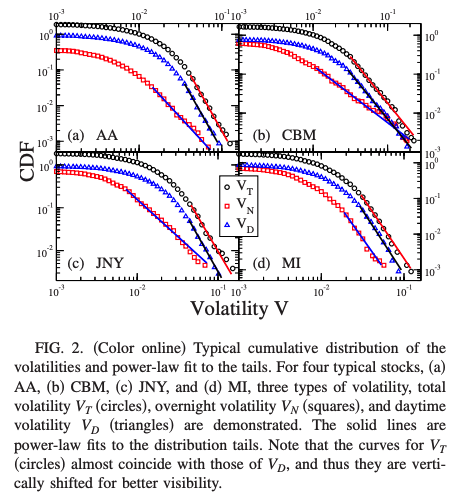

In [132]:
Image("스크린샷 2021-04-16 오전 3.55.40.png")

### Expected Returns

뿐만 아니라, 주간 수익률과 야간 수익률은 기대 수익률 측면에서도 매우 큰 차이를 보인다. 

D. Lou(2019)는 1993년부터 2013년까지 미국 주식시장에 상장된 개별 종목과 SPY를 대상으로 주간 수익률과 야간 수익률의 성질에 대해 분석하였다. D. Lou(2019)에 따르면, 약 20년간 SPY(S&P500 지수를 추종하는 ETF)의 상승을 주도한 것은 야간 수익률이며, 주간 수익률의 기대값은 유의미한 영향을 주지 못 했다고 밝혔다. 

[ D. Lou(2019), A tug of war: Overnight versus intraday expected returns ]

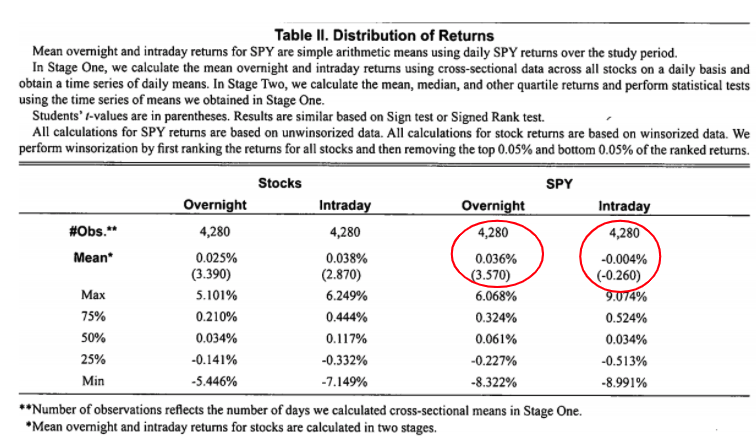

In [133]:
Image("스크린샷 2021-04-16 오전 4.39.10.png")

### 함의

1. 흔히 주식 수익률을 분석할 때에는 대부분 종가를 기준으로 측정한 수익률을 사용한다. 그러나, 종가 수익률은 주간 수익률과 야간 수익률로 분해될 수 있다. 분해된 주간 수익률과 야간 수익률은 매우 다른 성격을 갖는다. 

2. 일반적으로 주식 수익률은 변동성이 매우 크다(타 자산군 대비)고 알려져 있는데, 이는 반은 맞고 반은 틀린 이야기이다. 활발하게 거래가 이루어지는 주간 수익률은 높은 변동성을 보이는 반면, 야간 수익률은 상대적으로 안정적인 모습을 보인다.

3. 주간 수익률과 야간 수익률은 기대 수익률 측면에서도 매우 큰 차이를 보인다. 1993년부터 2013년까지 SPY의 야간 수익률의 기대 수익률은 양의 값으로 매우 유의적인 반면, 주간 수익률은 비유의적인 것으로 나타났다.

4. 한국 주식시장에 이를 적용한다고 할 때, 유사한 결과가 나올지 확인해볼 필요가 있다.

위 함의를 정리해보면, 야간 수익률은 기대 수익률도 매우 높고, 변동성도 낮아 매우 유리한 자산(?)으로 보여진다. 

### Q. Does The Same Thing Happen in Korean Stock Market?

In [134]:
rt["KSP_NIGHT"] = (1 + rt["KSP"]) / (1 + rt["KSP_DAY"]) -1

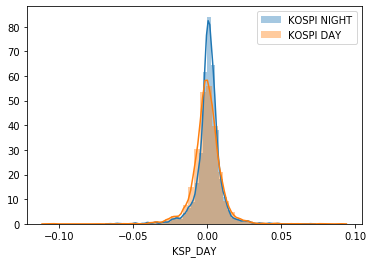

In [135]:
sns.distplot(rt['KSP_NIGHT'], label="KOSPI NIGHT")
sns.distplot(rt['KSP_DAY'], label="KOSPI DAY")
plt.legend(loc="best")

실제 코스피 지수를 대상으로 분석한 결과도 위와 동일한 것으로 나타났다. 야간 수익률은 주간수익률보다 1. 평균이 더 크며 2. 분산(변동성이)이 작고 첨도가 크다.


### Q. Is It On Going in U.S. Market?

In [136]:
rt["SNP_NIGHT"] = (1 + rt["SNP"]) / (1 + rt["SNP_DAY"]) -1

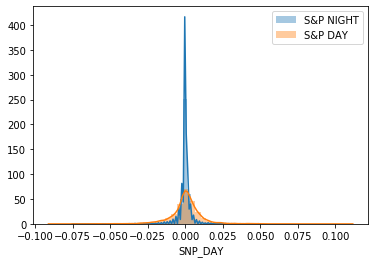

In [137]:
sns.distplot(rt['SNP_NIGHT'], label="S&P NIGHT")
sns.distplot(rt['SNP_DAY'], label="S&P DAY")
plt.legend(loc="best")

In [138]:
round(rt["SNP_NIGHT"].mean() * 100, 4) # S&P 야간 수익률의 기대값

0.0121

In [139]:
(stat, p) = sp.ttest_1samp(rt["SNP_NIGHT"], 0) # S&P 야간 수익률 t-test
round(p, 4)

0.0431

In [140]:
round(rt["SNP_DAY"].mean() * 100, 4) # S&P 주간 수익률의 기대값

0.0319

In [141]:
(stat, p) = sp.ttest_1samp(rt["SNP_DAY"], 0) # S&P 주간 수익률 t-test
round(p, 4)

0.0898

D.Lou(2019)와 분석 기간(1998-2013 vs 2006-2021)과 분석 대상(S&P500 vs SPY)의 차이에 의한 것인지 선행 문헌과 차이를 보인다.

야간 수익률의 변동성은 선행 연구와 동일하게 현저하게 낮은 모습이지만, 주간 수익률의 기대값은 매우 큰 값을 갖는다. 단, 높은 변동성으로 인해 유의적이라고 말하기는 어려울 것으로 보인다.

### Q. Is it Realizable(profitable)?

위 분석은 지수를 대상으로 한 것이기 때문에, 위와 똑같은 투자 결과를 기대하긴 어렵다. 개별 종목으로 지수 basket을 동일하게 구성하여도 추적 오차가 일부 존재할 수 있으며, 매매비용이 커서 overnight에만 제한적으로 노출시키는 것은 사실상 불가능하다. 뿐만 아니라, KOSPI지수와 KOSPI200 지수의 차이를 고려해주어야 한다. 상대적으로 수수료/세금이 저렴한 ETF나 지수 선물으로 투자하였을 때, 동일한 결과를 가져올 수 있을지 여부는 추가적인 검증이 필요하다.

### Q. Why Does it Happen?

일반적으로 양방향으로 호가를 제출하여 spread로 이득을 취하는 마켓 메이킹 전략을 추구하는 투자자들은 자산 가격 변동으로 인한 위험을 최소화하기 위해 장 종료 전까지 대부분 포지션을 청산한다. 만약 마켓 메이킹 투자자가 전체 시장 참여자에서 차지하는 비중이 크다면, 장 마감 전에 과매도 현상이 발생하여 종가가 실제 가치보다 일시적으로 낮아지는 현상이 발생할 것이다. 만약, 높은 야간 수익률이 마켓 메이커의 과매도로 인해 낮아진 종가에 의해 발생하는 현상이라면, 추가적인 시장미시구조 분석을 통해 마켓 메이킹 참여자의 추이와 야간 수익률 사이에서 유의미한 관계를 찾을 수 있지 않을까라는 추측을 해볼 수 있다.

## 미국 주식시장과 한국 주식시장의 동조화 현상

국내 유가증권시장의 개장시간은 09:00 ~15:30(KSP Time)이다. 반면, 미국 주식시장은 시차로 인해 한국 주식시장이 폐장된 이후 약 7시간 이후에 개장하며, 국내 주식시장이 개장하기 4시간 전에 폐장한다. 따라서, 두 시장의 거래 시간은 전혀 중복되지 않는다. 


![[박진우(2002), "미국 주가가 한국 주가에 미치는 영향에 관한 분석"]](https://github.com/DonghyungKo/til/blob/master/finance/american_korean_stock_market_synchronization/american_korean_stock_market_synchronization.png?raw=true)

### 선행연구

주식시장의 개방화와 함께 전 세계 주식시장 간의 동조화 현상이 심화되고 있다는 선행 연구가 활발히 이루어졌다. 특히, 미국의 주식시장은 세계의 주식시장으로 선행 연구결과에서는 공통적으로 '미국 주식시장의 움직임이 다른 국가의 시장에 상당한 영향을 미치고 있는 반면 다른 국가의 시장이 미국시장에 미치는 영향은 거의 없거나 있어도 제한적이라고 보고하고 있다. 박진우(2002) 에서는 미국 주가지수(SPY)와 한국 주가지수(KOSPI)를 대상으로 미국 주식시장이 한국 주식시장에 미치는 영향력에 대해 분석하였다.[박진우(2002), "미국 주가가 한국 주가에 미치는 영향에 관한 분석"]

박진우(2002)에 따르면, **미국 주식시장의 주간 수익률이 동시간대인 국내 주식시장의 야간 수익률에 대해 높은 설명력을 보였을 뿐만 아니라**, 주간 수익률에도 유의미한 설명력을 보였다. 그러나, **미국 주식시장의 주간 수익률이 국내 주식시장의 주간 수익률에 주는 영향은 개장 이후 10분에만 한정되었으며, 개장 직후 10분간의 가격 변동을 제외한 주간 수익률에는 아무런 설명력을 갖지 않았다.** 이는 유동성의 한계로 인해 정보의 전이(transmition)가 즉시 이뤄지지 않은 결과로 볼 수 있다고 말한다.

### 함의 및 해석

본 연구에서는 미국 주식시장의 일별 수익률이 국내 주식시장에 미치는 영향을 위주로 분석하였는데, 미국 주식시장의 주간 수익률이 국내 주식시장에 미치는 영향을 분석한 선행 연구에서도 미국 시장이 한국 시장에 선행한다는 연구 결과가 존재한다. 시간적인 여유가 부족하여 추가적인 분석을 수행하지 못 하였지만, 수익률을 주간/야간 수익률로 분해하여 접근함으로써 주식 시장을 더욱 세밀하게 분석할 수 있다는 점이 인상 깊었다.

**여기서 주목할 점은 미국 주식시장의 주간 수익률은 한국 주식시장의 야간 수익률에 큰 영향을 미치며 주간 수익률에 미치는 영향은 매우 짧게 지속된다는 점이다. 이처럼, 미국 주식시장과 한국 주식시장의 동조화가 매우 빠르게 진행되어 대부분의 정보가 야간 수익률에 반영된다면, 위의 결과와 같이 미국 주식시장의 변동이 일별 수익률(야간 수익률 + 주간 수익률)과 주간 수익률에 미치는 영향에서 차이를 보일 수 있을 것이다.**

**특히, 위에서 미국 주식시장의 변동이 코스피 지수의 일별 수익률과 주간 수익률에 미치는 영향의 부호가 다른 것이 매우 인상적이다.** F. Wang(2009) 에 따르면, 주간 수익률과 야간 수익률 사이에는 음의 상관관계가 존재한다. 이러한 현상은 전세계적으로 발생하는 것으로 관찰된다.

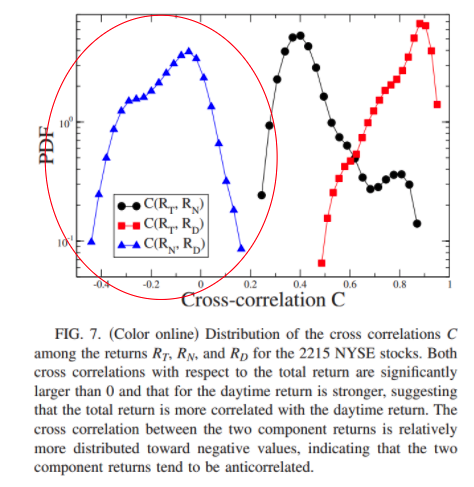

In [142]:
Image("스크린샷 2021-04-16 오전 5.05.26.png")

F.Wang(2009), "Statistical analysis of the overnight and daytime return"

### Q. Is It On Going in U.S. Market?

최근 S&P 데이터를 대상으로 분석한 결과에서는 위와 다른 결과가 나타난다. 

In [143]:
rt[["SNP", "SNP_DAY", "SNP_NIGHT"]].corr()

,SNP,SNP_DAY,SNP_NIGHT
SNP,1.000000,0.962672,0.517462
SNP_DAY,0.962672,1.000000,0.266668
SNP_NIGHT,0.517462,0.266668,1.000000


다음의 항목들이  결과의 차이가 발생한 원인으로 추측한다.

1. 개별 종목을 대상으로 하여 분포를 추정한 것과, 단일 지수(S&P500)를 사용한 것의 차이
2. 분석 시기의 차이 (1998-2007 vs 2006-2021)
3. 대형주와 소형주에서 발생하는 다른 결과로 인해, 대형주 위주의 지수와 소형주를 모두 포함한 분포에서 발생한 차이. 만약 대형주둘이 위 수익률의에서 우측 꼬리를 대부분 차지한다면 이는 선행 연구와 유사한 결과라고도 볼 수 있음


### Q. Does The Same Thing Happen in Korean Stock Market?

한국 주식시장을 대상으로 분석한 결과에서는 유사한 형태로 나타난다.

In [144]:
rt[["KSP", "KSP_DAY", "KSP_NIGHT"]].corr()

,KSP,KSP_DAY,KSP_NIGHT
KSP,1.000000,0.739653,0.612774
KSP_DAY,0.739653,1.000000,-0.078405
KSP_NIGHT,0.612774,-0.078405,1.000000


### 위에서 나타난 현상에 대한 추축/해석

1. 미국 주식시장이 한국 주식시장에 매우 큰 영향력을 행사하고 그 영향력은 대부분 한국 주식시장의 야간 수익률에 정방향(+)으로 반영된다. 
2. 야간 수익률과 주간 수익률 사이에는 음(-)의 상관관계가 존재한다.

=> 미국 주식시장이 한국 주식시장의 주간 수익률에 미치는 영향이 음수로 추정될 수 있다.

## 비대칭 변동성(asymmetric volatility) 

### 선행 연구

주식시장의 참여자들이 주식 상승 시기와 하락 시기에 다르게 행동하며, 특히 하락 시기에 더욱 민감하게 반응하는 비대칭 변동성(asymmetric volatility)는 선행연구에서 활발하게 다뤄지고 있는 주제 중 하나이다. 

Wu(2001)는 비대칭 변동성에 관한 실증 연구는 선행 문헌에서 많이 다루어지지만, 비대칭 변동성의 원인에 대해서는 명확한 결론을 내리지 못하고 있다고 말한다. Wu(2001)는 비대칭 변동성의 대표적인 원인으로 Black(1976)과 Campbell and Hentchel(1992)를 언급한다. Black(1976)의 주가 하락으로 인해 부채 비율이 상승하고 자기자본 위험이 증가하는 부채효과를 비대칭 변동성의 원인으로 지목한다. Campbell and Hentchel(1992)의 주식시장 참여자(수익률)가 나쁜 뉴스에 더 크게 반응한다는 변동성 피드백효과(volatility feedback effect)가 비대칭 변동성의 원인이라고 주장한다.

### 함의 및 해석

투자자의 비대칭적인 행태는 과거부터 많은 연구가 되어 왔으며 최근 행동경제학 분야에서도 중요한 주제로 다뤄지는 것으로 알고 있다. 비대칭 변동성은 비단 주식시장 뿐만 아니라 상품 시장(ex, 금 Baur(2012))에서도 관찰되며, 세계 대부분의 주식시장에서도 관찰된다 Talpsepp(2009)). **위에서 지속적으로 관찰된 현상은 비대칭 변동성의 대표적인 사례로 실증적으로는 관찰되지만 뚜렷한 해답을 내리긴 어려울 것으로 보인다.**

만약 투자자가 상승 시기와 하락 시기에 다르게 반응한다면, 투자 전략도 주식시장의 상황에 따라 비대칭적으로 작동하도록 보완함으로써 투자 전략을 개선할 수 있즐 것으로 기대한다.